In [2]:
# Imports
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.feature_selection import SelectKBest,chi2,RFE
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.feature_selection import SelectFromModel
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# from sklearn.feature_selection import SelectKBest, f_classif  # Replace with appropriate feature selection method
# from sklearn.ensemble import RandomForestClassifier

# from sklearn.ensemble._bagging import BaggingClassifier
# from sklearn.ensemble._forest import ExtraTreesClassifier

# from sklearn.tree import DecisionTreeClassifier 
# from sklearn.ensemble._bagging import BaggingClassifier
# from sklearn.metrics import confusion_matrix, fbeta_score

# from fairlearn.metrics import MetricFrame
# from fairlearn.metrics import selection_rate, count
# from fairlearn.postprocessing import ThresholdOptimizer
# from fairlearn.reductions import ExponentiatedGradient, ClassificationMoment, Moment, DemographicParity, GridSearch
# from fairlearn.metrics import equalized_odds_difference, equalized_odds_ratio, false_negative_rate_difference, false_positive_rate_difference, true_positive_rate_difference, true_negative_rate_difference, demographic_parity_ratio, demographic_parity_difference

# from sklearn.feature_selection import RFE
# from sklearn.svm import SVR
# from sklearn.feature_selection import RFECV

# # Suppress warnings
# def warn(*args, **kwargs):
#     pass
# import warnings
# warnings.warn = warn

In [3]:
teds_2019 = "/Users/yanchenglai/Desktop/GSU/GRA/2023 Fall/TEDS_cleaned_2019.csv"
teds_2019_puf = "/Users/yanchenglai/Desktop/GSU/GRA/2023 Fall/tedsd_puf_2019.csv"

In [ ]:
df = pd.read_csv(teds_2019)
df1 = pd.read_csv(teds_2019_puf)

In [ ]:
df.shape

In [5]:
pd.set_option('display.max_columns', None)
print(df)

              CASEID  STFIPS  CBSA2010  EDUC  MARSTAT  SERVICES  DETCRIM  LOS  \
0        20191553576       2        -9     4        1         7       -9   90   
1        20191465214       2        -9     3        1         7       -9   90   
2        20191443889       2        -9     2        1         7       -9   90   
3        20191409377       2        -9     3        1         7       -9   90   
4        20191479567       2        -9     3        3         7       -9   90   
...              ...     ...       ...   ...      ...       ...      ...  ...   
1722498  20191743528      56        -9     4        2         7       -9   90   
1722499  20191666713      56        -9     3        3         7        1   90   
1722500  20191405666      56        -9     2        1         6       -9   33   
1722501  20191697509      56        -9     1        1         7        3   90   
1722502  20191502624      56        -9    -9        4         7       -9   90   

         PSOURCE  NOPRIOR  

In [6]:
unique_categories = df['LOS'].unique()

LOS -> 1 to 30 are exact days
> 30 there are ranges.

In [7]:
unique_categories

array([90, 35, 36, 34, 37, 33, 31,  1, 27,  3,  6,  8, 30,  4,  5, 17,  2,
       32,  7, 10,  9, 13, 29, 11, 16, 24, 14, 12, 28, 15, 23, 19, 18, 26,
       20, 22, 21, 25])

In [8]:
df1.shape

(1722503, 76)

In [9]:
pd.set_option('display.max_columns', None)
print(df1)

         DISYR       CASEID  STFIPS  CBSA2010  EDUC  MARSTAT  SERVICES  \
0         2019  20191553576       2        -9     4        1         7   
1         2019  20191465214       2        -9     3        1         7   
2         2019  20191443889       2        -9     2        1         7   
3         2019  20191409377       2        -9     3        1         7   
4         2019  20191479567       2        -9     3        3         7   
...        ...          ...     ...       ...   ...      ...       ...   
1722498   2019  20191743528      56        -9     4        2         7   
1722499   2019  20191666713      56        -9     3        3         7   
1722500   2019  20191405666      56        -9     2        1         6   
1722501   2019  20191697509      56        -9     1        1         7   
1722502   2019  20191502624      56        -9    -9        4         7   

         DETCRIM  LOS  PSOURCE  NOPRIOR  ARRESTS  EMPLOY  METHUSE  PSYPROB  \
0             -9   37        1   

In [10]:
unique_categories = df1['LOS'].unique()
unique_categories

array([37, 35,  4, 34, 31, 36, 33,  1, 32,  7, 25, 12, 30,  8,  3, 21, 27,
       23, 14,  6,  5, 17,  2, 18, 13, 10,  9, 24, 11, 29, 16, 28, 19, 26,
       20, 15, 22])

Why are categories 1 & 2
- {}



In [14]:
df1.loc[df1['SERVICES_D'] == 1, 'In/Out'] = 1
df1.loc[df1['SERVICES_D'] == 2, 'In/Out'] = 2
df1.loc[df1['SERVICES_D'] == 3, 'In/Out'] = "Inpatient"
df1.loc[df1['SERVICES_D'] == 4, 'In/Out'] = "Inpatient"
df1.loc[df1['SERVICES_D'] == 5, 'In/Out'] = "Inpatient"
df1.loc[df1['SERVICES_D'] == 6, 'In/Out'] = "Outpatient"
df1.loc[df1['SERVICES_D'] == 7, 'In/Out'] = "Outpatient"
df1.loc[df1['SERVICES_D'] == 8, 'In/Out'] = "Outpatient"

In [15]:
pd.set_option('display.max_columns', None)
print(df1)

         DISYR       CASEID  STFIPS  CBSA2010  EDUC  MARSTAT  SERVICES  \
0         2019  20191553576       2        -9     4        1         7   
1         2019  20191465214       2        -9     3        1         7   
2         2019  20191443889       2        -9     2        1         7   
3         2019  20191409377       2        -9     3        1         7   
4         2019  20191479567       2        -9     3        3         7   
...        ...          ...     ...       ...   ...      ...       ...   
1722498   2019  20191743528      56        -9     4        2         7   
1722499   2019  20191666713      56        -9     3        3         7   
1722500   2019  20191405666      56        -9     2        1         6   
1722501   2019  20191697509      56        -9     1        1         7   
1722502   2019  20191502624      56        -9    -9        4         7   

         DETCRIM  LOS  PSOURCE  NOPRIOR  ARRESTS  EMPLOY  METHUSE  PSYPROB  \
0             -9   37        1   

In [16]:
a = df1.isnull().sum()

In [18]:
a.sum()

0

In [20]:
distribution = df1['LOS'].value_counts()

# To display the distribution:
print(distribution)

1     260581
33    140555
36    128974
34    114387
35    114266
31    111830
37     93500
32     84332
2      76837
3      64662
4      59844
5      56538
6      37461
7      33615
14     26575
28     26155
8      25518
15     19530
29     19057
21     18222
9      17296
13     16679
22     15384
10     15080
27     14217
30     13464
11     12884
20     12734
12     12658
16     12327
17     10605
23     10351
19      9855
18      9559
26      9299
24      9122
25      8550
Name: LOS, dtype: int64


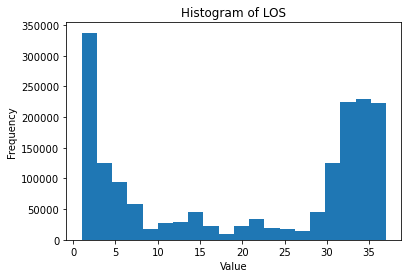

In [21]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' and a column 'column_name'
# To create a histogram for numerical data:
plt.hist(df1['LOS'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of LOS')
plt.show()

In [25]:
Inpatient = df1.loc[df1['In/Out'] == "Inpatient"]
Outpatient = df1.loc[df1['In/Out'] == "Outpatient"]

In [24]:
Inpatient['LOS'].mean()

20.649487641185136

In [26]:
Outpatient['LOS'].mean()

23.76769692862639

In [ ]:
If outpatient, we don't look at length of stay.
If the patient is in-patient we look at LOS.




In [37]:
df1.loc[(df1['In/Out'] == "Inpatient") & (df1['LOS'] > 30),"L/S"] = 1
df1.loc[(df1['In/Out'] == "Inpatient") & (df1['LOS'] <= 30),"L/S"] = 0
df1.loc[(df1['In/Out'] == "Outpatient") & (df1['LOS'] > 33),"L/S"] = 1
df1.loc[(df1['In/Out'] == "Outpatient") & (df1['LOS'] <= 33),"L/S"] = 0
df1.loc[(df1['In/Out'] == 1) & (df1['LOS'] > 30),"L/S"] = 1
df1.loc[(df1['In/Out'] == 1) & (df1['LOS'] <= 30),"L/S"] = 0
df1.loc[(df1['In/Out'] == 2) & (df1['LOS'] > 30),"L/S"] = 1
df1.loc[(df1['In/Out'] == 2) & (df1['LOS'] <= 30),"L/S"] = 0

In [38]:
df1

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,NOPRIOR,ARRESTS,EMPLOY,METHUSE,PSYPROB,PREG,GENDER,VET,LIVARAG,DAYWAIT,SERVICES_D,REASON,EMPLOY_D,LIVARAG_D,ARRESTS_D,DSMCRIT,AGE,RACE,ETHNIC,DETNLF,DETNLF_D,PRIMINC,SUB1,SUB2,SUB3,SUB1_D,SUB2_D,SUB3_D,ROUTE1,ROUTE2,ROUTE3,FREQ1,FREQ2,FREQ3,FREQ1_D,FREQ2_D,FREQ3_D,FRSTUSE1,FRSTUSE2,FRSTUSE3,HLTHINS,PRIMPAY,FREQ_ATND_SELF_HELP,FREQ_ATND_SELF_HELP_D,ALCFLG,COKEFLG,MARFLG,HERFLG,METHFLG,OPSYNFLG,PCPFLG,HALLFLG,MTHAMFLG,AMPHFLG,STIMFLG,BENZFLG,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG,In/Out,L/S
0,2019,20191553576,2,-9,4,1,7,-9,37,1,0,0,2,2,1,2,2,2,3,0,7,1,2,3,0,19,4,1,4,-9,-9,1,2,1,1,2,1,1,1,-9,-9,2,-9,-9,2,-9,-9,5,-9,-9,3,7,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,4,0,1,Outpatient,1.0
1,2019,20191465214,2,-9,3,1,7,-9,35,1,0,0,1,2,1,2,2,2,3,0,7,3,1,3,0,4,5,1,4,-9,-9,1,2,4,1,2,4,1,1,2,-9,2,3,-9,2,2,-9,3,3,-9,3,7,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,4,0,3,Outpatient,1.0
2,2019,20191443889,2,-9,2,1,7,-9,35,1,0,0,4,2,1,2,2,2,3,0,7,3,4,3,0,19,1,8,4,2,2,4,2,4,1,2,4,1,1,2,-9,2,2,-9,2,2,-9,2,2,-9,2,4,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,4,0,3,Outpatient,1.0
3,2019,20191409377,2,-9,3,1,7,-9,37,1,1,0,3,2,1,2,2,2,3,0,7,1,3,3,0,4,5,1,4,-9,-9,4,2,5,4,2,5,4,1,2,2,1,1,1,1,3,1,3,5,3,3,7,4,4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,4,0,3,Outpatient,1.0
4,2019,20191479567,2,-9,3,3,7,-9,37,1,1,0,4,2,1,2,2,2,3,0,7,3,4,3,0,4,11,8,4,3,3,4,2,1,1,2,1,1,1,-9,-9,1,-9,-9,1,-9,-9,7,-9,-9,3,7,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,4,0,1,Outpatient,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722498,2019,20191743528,56,-9,4,2,7,-9,33,1,0,0,1,2,2,-9,1,2,3,1,7,2,2,3,0,4,11,5,4,-9,-9,1,2,1,1,2,1,1,-9,-9,-9,1,-9,-9,1,-9,-9,3,-9,-9,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,4,0,1,Outpatient,0.0
1722499,2019,20191666713,56,-9,3,3,7,1,13,7,0,0,4,2,2,-9,1,2,3,1,7,2,4,3,0,10,8,2,1,3,3,3,4,1,1,4,1,1,2,-9,-9,2,-9,-9,1,-9,-9,4,-9,-9,2,4,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,4,0,2,Outpatient,0.0
1722500,2019,20191405666,56,-9,2,1,6,-9,33,1,0,0,3,2,1,2,2,2,3,2,6,4,3,3,0,8,3,5,4,-9,-9,1,10,4,1,10,4,1,-9,-9,-9,1,1,-9,3,2,-9,2,1,-9,4,7,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,4,0,2,Outpatient,0.0
1722501,2019,20191697509,56,-9,1,1,7,3,14,7,0,0,4,2,2,-9,1,2,2,1,7,1,4,2,0,7,2,5,4,4,4,2,4,2,9,4,2,9,-9,-9,-9,1,1,1,1,2,1,3,3,3,2,4,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,4,0,3,Outpatient,0.0


In [41]:
b = df1.isnull().sum()
b.sum()

0

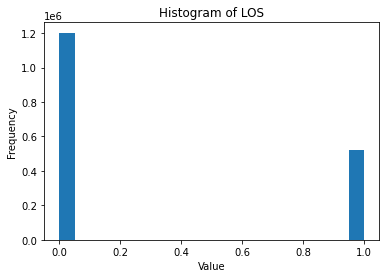

In [42]:
# Assuming you have a DataFrame named 'df' and a column 'column_name'
# To create a histogram for numerical data:
plt.hist(df1['L/S'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of LOS')
plt.show()

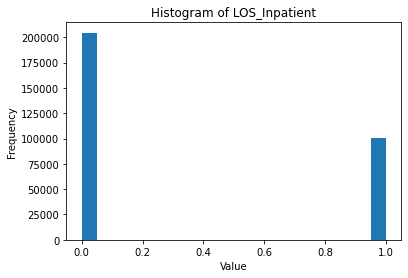

In [43]:
# Assuming you have a DataFrame named 'df' and a column 'column_name'
# To create a histogram for numerical data:
plt.hist(df1.loc[(df1['In/Out'] == "Inpatient"),"L/S"], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of LOS_Inpatient')
plt.show()

In [45]:
dist_In = df1.loc[(df1['In/Out'] == "Inpatient"),"L/S"].value_counts()

# To display the distribution:
print(dist_In)

0.0    204526
1.0    100924
Name: L/S, dtype: int64


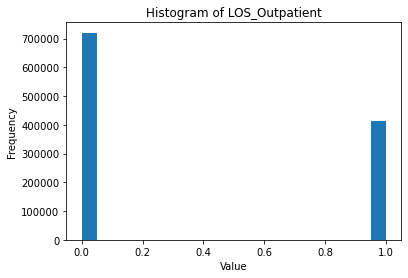

In [44]:
# Assuming you have a DataFrame named 'df' and a column 'column_name'
# To create a histogram for numerical data:
plt.hist(df1.loc[(df1['In/Out'] == "Outpatient"),"L/S"], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of LOS_Outpatient')
plt.show()

In [46]:
dist_Out = df1.loc[(df1['In/Out'] == "Outpatient"),"L/S"].value_counts()

# To display the distribution:
print(dist_Out)

0.0    720493
1.0    412811
Name: L/S, dtype: int64


In [47]:
dist_In_M = df1.loc[(df1['In/Out'] == "Inpatient")&(df1['GENDER'] == 1),"L/S"].value_counts()

# To display the distribution:
print(dist_In_M)

0.0    132769
1.0     64889
Name: L/S, dtype: int64


In [54]:
dist_Out_M = df1.loc[(df1['In/Out'] == "Outpatient")&(df1['GENDER'] == 1),"L/S"].value_counts()

# To display the distribution:
print(dist_Out_M)

0.0    443969
1.0    257794
Name: L/S, dtype: int64


In [48]:
dist_In_F = df1.loc[(df1['In/Out'] == "Inpatient")&(df1['GENDER'] == 2),"L/S"].value_counts()

# To display the distribution:
print(dist_In_F)

0.0    71652
1.0    35959
Name: L/S, dtype: int64


In [55]:
dist_Out_F = df1.loc[(df1['In/Out'] == "Outpatient")&(df1['GENDER'] == 2),"L/S"].value_counts()

# To display the distribution:
print(dist_Out_F)

0.0    276267
1.0    154792
Name: L/S, dtype: int64


In [56]:
dist_In_Unknown = df1.loc[(df1['In/Out'] == "Inpatient")&(df1['GENDER'] == -9),"L/S"].value_counts()

# To display the distribution:
print(dist_In_Unknown)

0.0    105
1.0     76
Name: L/S, dtype: int64


In [57]:
dist_Out_Unknown = df1.loc[(df1['In/Out'] == "Outpatient")&(df1['GENDER'] == -9),"L/S"].value_counts()

# To display the distribution:
print(dist_Out_Unknown)

0.0    257
1.0    225
Name: L/S, dtype: int64


In [52]:
df1

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,NOPRIOR,ARRESTS,EMPLOY,METHUSE,PSYPROB,PREG,GENDER,VET,LIVARAG,DAYWAIT,SERVICES_D,REASON,EMPLOY_D,LIVARAG_D,ARRESTS_D,DSMCRIT,AGE,RACE,ETHNIC,DETNLF,DETNLF_D,PRIMINC,SUB1,SUB2,SUB3,SUB1_D,SUB2_D,SUB3_D,ROUTE1,ROUTE2,ROUTE3,FREQ1,FREQ2,FREQ3,FREQ1_D,FREQ2_D,FREQ3_D,FRSTUSE1,FRSTUSE2,FRSTUSE3,HLTHINS,PRIMPAY,FREQ_ATND_SELF_HELP,FREQ_ATND_SELF_HELP_D,ALCFLG,COKEFLG,MARFLG,HERFLG,METHFLG,OPSYNFLG,PCPFLG,HALLFLG,MTHAMFLG,AMPHFLG,STIMFLG,BENZFLG,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG,In/Out,L/S
0,2019,20191553576,2,-9,4,1,7,-9,37,1,0,0,2,2,1,2,2,2,3,0,7,1,2,3,0,19,4,1,4,-9,-9,1,2,1,1,2,1,1,1,-9,-9,2,-9,-9,2,-9,-9,5,-9,-9,3,7,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,4,0,1,Outpatient,1.0
1,2019,20191465214,2,-9,3,1,7,-9,35,1,0,0,1,2,1,2,2,2,3,0,7,3,1,3,0,4,5,1,4,-9,-9,1,2,4,1,2,4,1,1,2,-9,2,3,-9,2,2,-9,3,3,-9,3,7,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,4,0,3,Outpatient,1.0
2,2019,20191443889,2,-9,2,1,7,-9,35,1,0,0,4,2,1,2,2,2,3,0,7,3,4,3,0,19,1,8,4,2,2,4,2,4,1,2,4,1,1,2,-9,2,2,-9,2,2,-9,2,2,-9,2,4,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,4,0,3,Outpatient,1.0
3,2019,20191409377,2,-9,3,1,7,-9,37,1,1,0,3,2,1,2,2,2,3,0,7,1,3,3,0,4,5,1,4,-9,-9,4,2,5,4,2,5,4,1,2,2,1,1,1,1,3,1,3,5,3,3,7,4,4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,4,0,3,Outpatient,1.0
4,2019,20191479567,2,-9,3,3,7,-9,37,1,1,0,4,2,1,2,2,2,3,0,7,3,4,3,0,4,11,8,4,3,3,4,2,1,1,2,1,1,1,-9,-9,1,-9,-9,1,-9,-9,7,-9,-9,3,7,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,4,0,1,Outpatient,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722498,2019,20191743528,56,-9,4,2,7,-9,33,1,0,0,1,2,2,-9,1,2,3,1,7,2,2,3,0,4,11,5,4,-9,-9,1,2,1,1,2,1,1,-9,-9,-9,1,-9,-9,1,-9,-9,3,-9,-9,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,4,0,1,Outpatient,0.0
1722499,2019,20191666713,56,-9,3,3,7,1,13,7,0,0,4,2,2,-9,1,2,3,1,7,2,4,3,0,10,8,2,1,3,3,3,4,1,1,4,1,1,2,-9,-9,2,-9,-9,1,-9,-9,4,-9,-9,2,4,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,4,0,2,Outpatient,0.0
1722500,2019,20191405666,56,-9,2,1,6,-9,33,1,0,0,3,2,1,2,2,2,3,2,6,4,3,3,0,8,3,5,4,-9,-9,1,10,4,1,10,4,1,-9,-9,-9,1,1,-9,3,2,-9,2,1,-9,4,7,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,4,0,2,Outpatient,0.0
1722501,2019,20191697509,56,-9,1,1,7,3,14,7,0,0,4,2,2,-9,1,2,2,1,7,1,4,2,0,7,2,5,4,4,4,2,4,2,9,4,2,9,-9,-9,-9,1,1,1,1,2,1,3,3,3,2,4,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,4,0,3,Outpatient,0.0


In [53]:
df1.to_csv('TEDS_cleaned_2019_Yan.csv', index=False)

Notes
- Only two transformations.
- Notebook is only for producing the target variable.

    

